# Usage

# Requirements and Setup

In [2]:
import struct
import pandas as pd
from enum import IntEnum
import os, time, datetime
import pyarrow.feather as feather
import matplotlib.pyplot as plt

# %matplotlib widget

# values are 16-byte in packet unless noted here
class LogFmt(IntEnum):
	TACH = 0 		# resolution = 1
	CHT1 = 1 		# CHT and EGT resolution is all 1 degree (F?)
	CHT2 = 2
	CHT3 = 3
	CHT4 = 4
	CHT5 = 5
	CHT6 = 6
	EGT1 = 7
	EGT2 = 8
	EGT3 = 9
	EGT4 = 10
	EGT5 = 11
	EGT6 = 12
	AUX5 = 13
	AUX6 = 14
	ASPD = 15
	ALT = 16 		# altitude in 10s of ft, 2s complement
	VOLT = 17 		# resolution 100 mV
	FUELF = 18		# Fuel Flow resolution 0.1 gal/hr
	UNITT = 19 		# 1-byte internal instrument temp
	CARBT = 20 		# 1-byte carb temp, 2s complement
	ROCSGN = 21		# vert speed, 100 fpm resolution 2s complement
	OAT = 22		# unsigned 8-bit value offset by +50
	OILT = 23
	OILP = 24 		# 1-byte, resolution 1 psi?
	AUX1 = 25
	AUX2 = 26
	AUX3 = 27
	AUX4 = 28
	COOL = 29 		# coolant temp or tach3
	ETI = 30 		# hour meter, resolution 0.1 hour
	QTY = 31		# fuel qty resolution 0.1 gal
	HRS = 32 		# 1-byte, flight timer hours
	MIN = 33		# 1-byte
	SEC = 34 		# 1-byte
	ENDHRS = 35 	# 1-byte, fuel flow time til empty, hours
	ENDMINS = 36	# 1-byte, fuel flow time til empty, mins
	BARO = 37		# altimeter setting in inches of Hg, resolution 0.01"
	TACH2 = 38
	SPARE = 39		# 1-byte
	CHK = 40		# 1-byte checksum

# Load Existing Database

In [3]:
with open('./acft_log_db', 'rb') as f:
    try:
        all_logs_df = feather.read_feather(f)
        print("Loaded existing database")
    except:
        # TODO Prompt user to confirm before overwriting database if read fails
        print("Failed to read stored database, creating new")
        all_logs_dict = {
            "tach": [],
#             "cht2": [],
#             "cht3": [],
#             "egt1": [],
#             "egt2": [],
#             "egt3": [],
#             "egt4": [],
#             "volts": [],
#             "unit_temp_f": [],
#             "coolant_temp_f": [],
            "oil_temp_f": [],
            "oil_pres_psi": []
#             "aux1": [],
#             "aux2": [],
#             "aux3": [],
#             "aux4": [],
#             "aux5": [],
#             "aux6": [],
#             "tach_hrs": [],
#             "flight_hrs": []
        }
        

Failed to read stored database, creating new


# Parse New Log Files

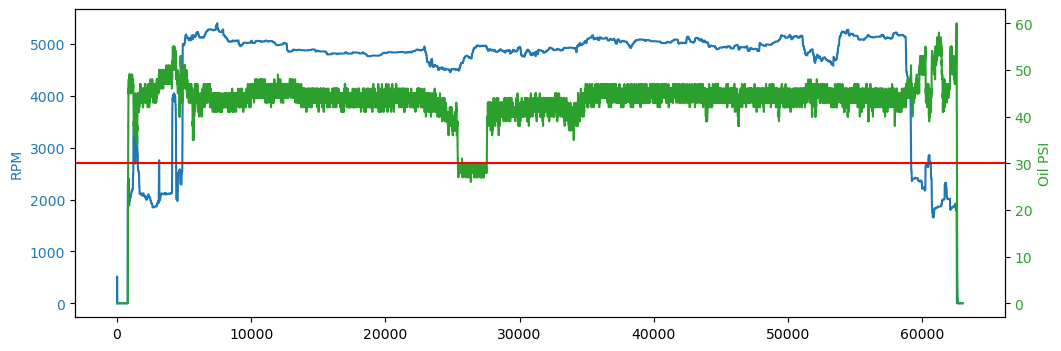

In [6]:
directory = os.fsencode('./new_logs')
    
# TODO ignore or get rid of .DS_Store
# TODO sort by filename
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    
    # TODO enumerate individual flights, with start/end tach, in database
    # This just clears the struct so I can check tach start/end on multiple log files at once
    all_logs_dict = {
        "tach": [],
        "cht2": [],
        "cht3": [],
        "egt1": [],
        "egt2": [],
        "egt3": [],
        "egt4": [],
        "volts": [],
        "unit_temp_f": [],
        "coolant_temp_f": [],
        "oil_temp_f": [],
        "oil_pres_psi": [],
        "aux1": [],
        "aux2": [],
        "aux3": [],
        "aux4": [],
        "aux5": [],
        "aux6": [],
        "tach_hrs": [],
        "flight_hrs": []
    }

    # 'rb' flag required to read text file in binary format
    with open('./new_logs/'+filename,'rb') as logfile:
        # largest log file I've managed to generate so far is 13.9 MB
        logbuffer = logfile.read()

    lines = logbuffer.split(b'\xfe\xff\xfe')
    
    # TODO remember how to print multiple formatted args on one line
#     print("Read %d points from log file " % len(lines), end="")
#     print("%s" % filename)

    # presume first and last packet are incomplete and dump them
    for idx, line in enumerate(lines[1:len(lines)-1]):
        try:
            unpacked_line = struct.unpack('>hhhhhhhhhhhhhhhhhhhbbbbhbhhhhhhhbbbbbhhbb', line)
        except:
            continue
            # TODO all logs seem to have a bad packet at same index? (6)
#             print("Bad packet at idx %d" % idx)

        # TODO look at adding these to df, rather than dict - otherwise, translate existing df to dict in section above
        all_logs_dict["tach"].append(unpacked_line[LogFmt.TACH])
        all_logs_dict["cht2"].append(unpacked_line[LogFmt.CHT2])
        all_logs_dict["cht3"].append(unpacked_line[LogFmt.CHT3])
        all_logs_dict["egt1"].append(unpacked_line[LogFmt.EGT1])
        all_logs_dict["egt2"].append(unpacked_line[LogFmt.EGT2])
        all_logs_dict["egt3"].append(unpacked_line[LogFmt.EGT3])
        all_logs_dict["egt4"].append(unpacked_line[LogFmt.EGT4])
        all_logs_dict["volts"].append(unpacked_line[LogFmt.VOLT] * 0.1)
        all_logs_dict["unit_temp_f"].append(unpacked_line[LogFmt.UNITT])
        all_logs_dict["coolant_temp_f"].append(unpacked_line[LogFmt.COOL])
        all_logs_dict["oil_temp_f"].append(unpacked_line[LogFmt.OILT])
        all_logs_dict["oil_pres_psi"].append(unpacked_line[LogFmt.OILP])
        all_logs_dict["aux1"].append(unpacked_line[LogFmt.AUX1])
        all_logs_dict["aux2"].append(unpacked_line[LogFmt.AUX2])
        all_logs_dict["aux3"].append(unpacked_line[LogFmt.AUX3])
        all_logs_dict["aux4"].append(unpacked_line[LogFmt.AUX4])
        all_logs_dict["aux5"].append(unpacked_line[LogFmt.AUX5])
        all_logs_dict["aux6"].append(unpacked_line[LogFmt.AUX6])
        all_logs_dict["tach_hrs"].append(unpacked_line[LogFmt.ETI] * 0.1)
        all_logs_dict["flight_hrs"].append(unpacked_line[LogFmt.HRS] + (unpacked_line[LogFmt.MIN] / 60) + (unpacked_line[LogFmt.SEC] / 3600))

#     print("Processed %d lines" % idx)
#     print("%s " % filename,end="")
#     print("Tach from %.1f " % all_logs_dict["tach_hrs"][0], end="")
#     print("to %.1f " % all_logs_dict["tach_hrs"][len(all_logs_dict["tach_hrs"])-1])

    
# TODO Figure out how to upload to savvy aircraft mx instead

# all_logs_df = pd.DataFrame(all_logs_dict)
# print(log_dataframe)

fig, ax1 = plt.subplots(1,1,figsize=(12,4))

color = 'tab:blue'
ax1.set_ylabel('RPM', color=color)
ax1.plot(all_logs_dict["tach"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Oil PSI', color=color)  # we already handled the x-label with ax1
ax2.plot(all_logs_dict["oil_pres_psi"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y = 30, color = 'r', linestyle = '-')

# ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:orange'
# ax2.set_ylabel('Oil Temp F', color=color)  # we already handled the x-label with ax1
# ax2.plot(all_logs_dict["oil_temp_f"], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.ion()
plt.show()

# Save New Database

In [ ]:
# feather.write_feather(all_logs_df, './acft_log_db')

# Log Review Tools

## List Recorded Flights

## Select Flights to Plot

## Choose Plot Layout and Channels for Each

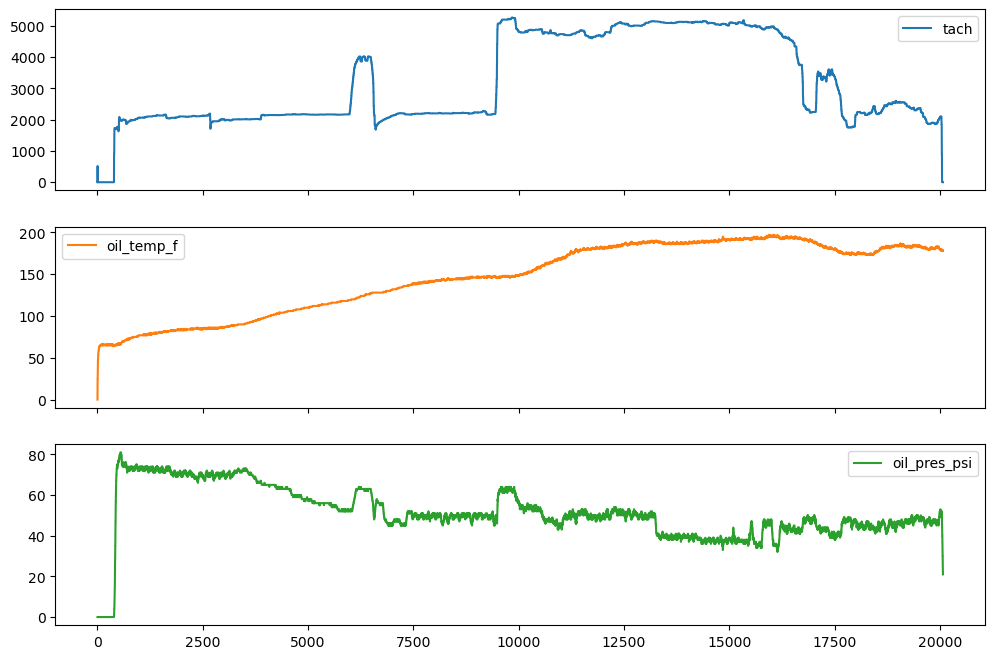

In [82]:
#### all_logs_df.plot()

# TODO Plot multiple channels on same figure with different axes
axs = all_logs_df.plot(figsize=(12,8),subplots=True)
plt.show()
